# Read Data

In [1]:
import pandas as pd

In [2]:
train_text = pd.read_parquet('train.parquet')

In [3]:
print(train_text.shape)
train_text.head()

(1000, 2)


,text,label
0,− Scope 3: Optional scope that includes indire...,1
1,The Group is not aware of any noise pollution ...,0
2,Global climate change could exacerbate certain...,0
3,Setting an investment horizon is part and parc...,0
4,Climate change the physical impacts of climate...,0


# Preprocessing

In [4]:
import nltk
# nltk.download('punkt')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string

In [5]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

In [6]:
def preprocessing(df):
    
    df_new = df.copy()
    tokenise_text = [nltk.word_tokenize(text.lower().replace('’', "'")) for text in df['text']]
    stop_words = [item for item in ENGLISH_STOP_WORDS]
    punctuations = [item for item in string.punctuation]
    punctuations.append('−')
    punctuations.append('—')
    punctuations.append('‘')
    punctuations.append('``')
    punctuations.append("''")
    punctuations.append('""')
    punctuations.append('•')
    
    lemmatizer = WordNetLemmatizer()
    stemmed_text = []
    stemmed_text_wo_punct = []
    for text in tokenise_text:
        
        pos_tagged = pos_tag(text)
        stemmed_word = [
            lemmatizer.lemmatize(word, pos = get_wordnet_pos(pos))
            for word, pos in pos_tagged if not word in stop_words
        ]
        stemmed_text.append(stemmed_word)
        
        stemmed_word_wo_punct = [
            word for word in stemmed_word if not word in punctuations
        ]
        stemmed_text_wo_punct.append(stemmed_word_wo_punct)
    
    df_new['processed'] = stemmed_text
    df_new['processed_wo_punct'] = stemmed_text_wo_punct
    
    return df_new

In [7]:
train_text_processed = preprocessing(train_text)

In [8]:
print(train_text.shape)
train_text_processed.head()

(1000, 2)


,text,label,processed,processed_wo_punct
0,− Scope 3: Optional scope that includes indire...,1,"[−, scope, 3, :, optional, scope, include, ind...","[scope, 3, optional, scope, include, indirect,..."
1,The Group is not aware of any noise pollution ...,0,"[group, aware, noise, pollution, negatively, i...","[group, aware, noise, pollution, negatively, i..."
2,Global climate change could exacerbate certain...,0,"[global, climate, change, exacerbate, certain,...","[global, climate, change, exacerbate, certain,..."
3,Setting an investment horizon is part and parc...,0,"[set, investment, horizon, parcel, policy, foc...","[set, investment, horizon, parcel, policy, foc..."
4,Climate change the physical impacts of climate...,0,"[climate, change, physical, impact, climate, c...","[climate, change, physical, impact, climate, c..."


In [126]:
train_text_processed['text'][0]

'− Scope 3: Optional scope that includes indirect emissions associated with the goods and services supply chain produced outside the organization. Included are emissions from the transport of products from our logistics centres to stores (downstream) performed by external logistics operators (air, land and sea transport) as well as the emissions associated with electricity consumption in franchise stores.'

In [127]:
' '. join(train_text_processed['processed_wo_punct'][0])

'scope 3 optional scope include indirect emission associate good service supply chain produce outside organization include emission transport product logistics centre store downstream perform external logistics operator air land sea transport emission associate electricity consumption franchise store'

# Descriptive Statistics

In [9]:
label_proportion = train_text.groupby('label').count()

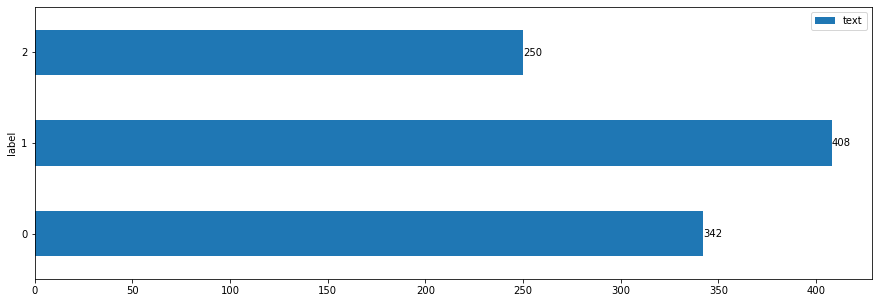

In [10]:
label_proportion_plot = label_proportion.plot.barh(figsize = (15, 5))

for container in label_proportion_plot.containers:
    label_proportion_plot.bar_label(container)

In [11]:
positive_df = train_text_processed.loc[train_text_processed['label'] == 2]

In [12]:
print(positive_df.shape)
positive_df.head()

(250, 4)


,text,label,processed,processed_wo_punct
16,We want to contribute to the transition to a c...,2,"[want, contribute, transition, circular, econo...","[want, contribute, transition, circular, econo..."
22,Dominion East Ohio Pipeline Infrastructure Rep...,2,"[dominion, east, ohio, pipeline, infrastructur...","[dominion, east, ohio, pipeline, infrastructur..."
23,South West Water has maintained its investment...,2,"[south, west, water, maintain, investment, ren...","[south, west, water, maintain, investment, ren..."
24,The EBRD provided a total of €98 million to fi...,2,"[ebrd, provide, total, €98, million, finance, ...","[ebrd, provide, total, €98, million, finance, ..."
25,(€165 million equivalent) loan to finance the ...,2,"[(, €165, million, equivalent, ), loan, financ...","[€165, million, equivalent, loan, finance, con..."


In [13]:
neutral_df = train_text_processed.loc[train_text_processed['label'] == 1]

In [14]:
print(neutral_df.shape)
neutral_df.head()

(408, 4)


,text,label,processed,processed_wo_punct
0,− Scope 3: Optional scope that includes indire...,1,"[−, scope, 3, :, optional, scope, include, ind...","[scope, 3, optional, scope, include, indirect,..."
6,We emitted 13.4 million tonnes CO2 of Scope 2 ...,1,"[emit, 13.4, million, tonne, co2, scope, 2, (,...","[emit, 13.4, million, tonne, co2, scope, 2, in..."
7,We do not provide normalised figures for our C...,1,"[provide, normalised, figure, co2, emission, r...","[provide, normalised, figure, co2, emission, r..."
10,Offsetting our emissions Australian Ethical of...,1,"[offset, emission, australian, ethical, offset...","[offset, emission, australian, ethical, offset..."
14,– Omissions Emissions associated with joint ve...,1,"[–, omission, emission, associate, joint, vent...","[–, omission, emission, associate, joint, vent..."


In [15]:
negative_df = train_text_processed.loc[train_text_processed['label'] == 0]

In [16]:
print(negative_df.shape)
negative_df.head()

(342, 4)


,text,label,processed,processed_wo_punct
1,The Group is not aware of any noise pollution ...,0,"[group, aware, noise, pollution, negatively, i...","[group, aware, noise, pollution, negatively, i..."
2,Global climate change could exacerbate certain...,0,"[global, climate, change, exacerbate, certain,...","[global, climate, change, exacerbate, certain,..."
3,Setting an investment horizon is part and parc...,0,"[set, investment, horizon, parcel, policy, foc...","[set, investment, horizon, parcel, policy, foc..."
4,Climate change the physical impacts of climate...,0,"[climate, change, physical, impact, climate, c...","[climate, change, physical, impact, climate, c..."
5,Projects with potential limited adverse social...,0,"[project, potential, limited, adverse, social,...","[project, potential, limited, adverse, social,..."


## Word Frequency by Label

### Positive

In [17]:
from nltk import FreqDist

In [18]:
positive_words = []
for text in positive_df['processed_wo_punct']:
    for word in text:
        positive_words.append(word)

In [19]:
positive_freq_df = pd.DataFrame()

In [20]:
positive_word_list = []
positive_word_freq = []
for item in FreqDist(positive_words):
    positive_word_list.append(item)
    positive_word_freq.append(FreqDist(positive_words)[item])

In [21]:
positive_freq_df['words'] = positive_word_list
positive_freq_df['freq'] = positive_word_freq
positive_freq_df.set_index('words', inplace = True)

In [22]:
print(positive_freq_df.shape)
positive_freq_df.head(10)

(2799, 1)


,freq
words,
energy,180
million,130
climate,116
investment,114
project,107
's,97
carbon,82
emission,80
fund,80


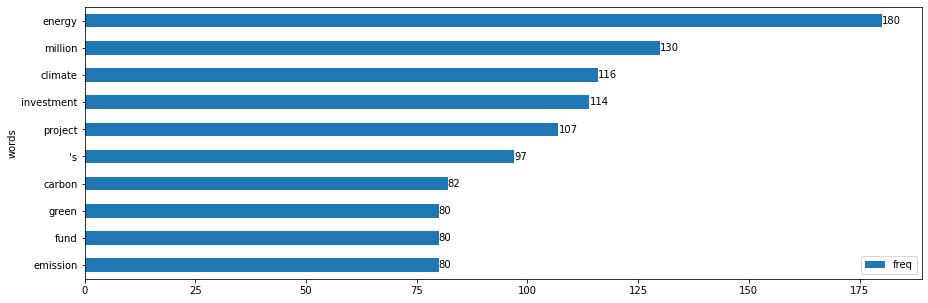

In [23]:
positive_freq_df_plot = positive_freq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in positive_freq_df_plot.containers:
    positive_freq_df_plot.bar_label(container)

### Neutral

In [24]:
neutral_words = []
for text in neutral_df['processed_wo_punct']:
    for word in text:
        neutral_words.append(word)

In [25]:
neutral_freq_df = pd.DataFrame()

In [26]:
neutral_word_list = []
neutral_word_freq = []
for item in FreqDist(neutral_words):
    neutral_word_list.append(item)
    neutral_word_freq.append(FreqDist(neutral_words)[item])

In [27]:
neutral_freq_df['words'] = neutral_word_list
neutral_freq_df['freq'] = neutral_word_freq
neutral_freq_df.set_index('words', inplace = True)

In [28]:
print(neutral_freq_df.shape)
neutral_freq_df.head(10)

(3279, 1)


,freq
words,
emission,259
climate,221
's,157
risk,152
energy,138
carbon,137
change,131
environmental,124
target,114


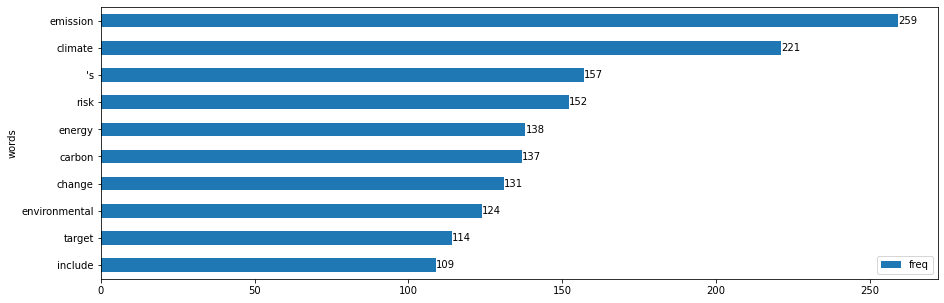

In [29]:
neutral_freq_df_plot = neutral_freq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in neutral_freq_df_plot.containers:
    neutral_freq_df_plot.bar_label(container)

### Negative

In [30]:
negative_words = []
for text in negative_df['processed_wo_punct']:
    for word in text:
        negative_words.append(word)

In [31]:
negative_freq_df = pd.DataFrame()

In [32]:
negative_word_list = []
negative_word_freq = []
for item in FreqDist(negative_words):
    negative_word_list.append(item)
    negative_word_freq.append(FreqDist(negative_words)[item])

In [33]:
negative_freq_df['words'] = negative_word_list
negative_freq_df['freq'] = negative_word_freq
negative_freq_df.set_index('words', inplace = True)

In [34]:
print(negative_freq_df.shape)
negative_freq_df.head(10)

(2811, 1)


,freq
words,
risk,597
change,301
climate,298
impact,242
increase,138
include,128
business,121
physical,121
's,109


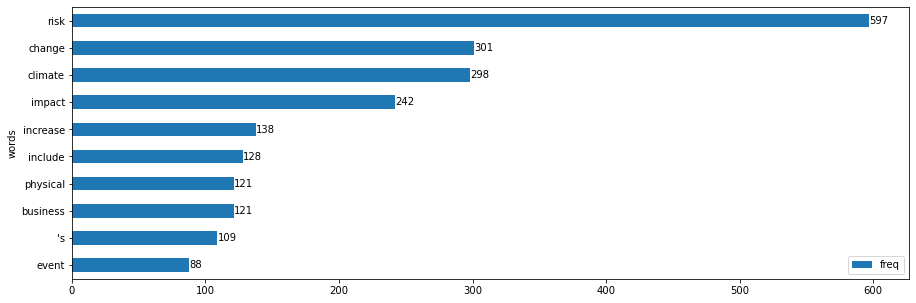

In [35]:
negative_freq_df_plot = negative_freq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in negative_freq_df_plot.containers:
    negative_freq_df_plot.bar_label(container)

### All

In [36]:
all_words = []
for text in train_text_processed['processed_wo_punct']:
    for word in text:
        all_words.append(word)

In [37]:
all_freq_df = pd.DataFrame()

In [38]:
all_word_list = []
all_word_freq = []
for item in FreqDist(all_words):
    all_word_list.append(item)
    all_word_freq.append(FreqDist(all_words)[item])

In [39]:
all_freq_df['words'] = all_word_list
all_freq_df['freq'] = all_word_freq
all_freq_df.set_index('words', inplace = True)

In [40]:
print(all_freq_df.shape)
all_freq_df.head(10)

(5747, 1)


,freq
words,
risk,772
climate,635
change,487
emission,402
energy,388
's,363
impact,331
include,298
carbon,291


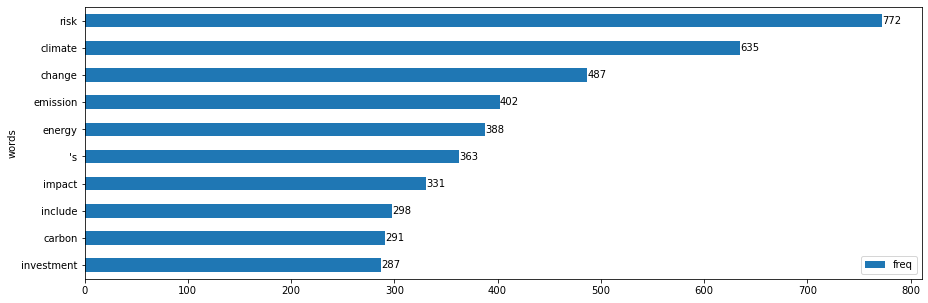

In [41]:
all_freq_df_plot = all_freq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in all_freq_df_plot.containers:
    all_freq_df_plot.bar_label(container)

### Compare

In [42]:
all_total = sum([num for num in all_freq_df['freq']])
positive_total = sum([num for num in positive_freq_df['freq']])
neutral_total = sum([num for num in neutral_freq_df['freq']])
negative_total = sum([num for num in negative_freq_df['freq']])
total_list = [all_total, positive_total, neutral_total, negative_total]

In [128]:
total_list

[43303, 11597, 16730, 14976]

In [43]:
top_10_word = all_freq_df.index.tolist()[0:10]

In [44]:
all_word_df = all_freq_df.head(10).copy().drop('freq', axis = 1)

all_freq_top_10 = [num for num in all_freq_df.head(10)['freq']]
all_word_df['All'] = all_freq_top_10

positive_freq_top_10 = []
for word in top_10_word:
    for item in FreqDist(positive_words):
        if word == item:
            positive_freq_top_10.append(FreqDist(positive_words)[word])
all_word_df['Positive'] = positive_freq_top_10

neutral_freq_top_10 = []
for word in top_10_word:
    for item in FreqDist(neutral_words):
        if word == item:
            neutral_freq_top_10.append(FreqDist(neutral_words)[word])
all_word_df['Neutral'] = neutral_freq_top_10

negative_freq_top_10 = []
for word in top_10_word:
    for item in FreqDist(negative_words):
        if word == item:
            negative_freq_top_10.append(FreqDist(negative_words)[word])
all_word_df['Negative'] = negative_freq_top_10

In [45]:
all_word_df

,All,Positive,Neutral,Negative
words,,,,
risk,772,23,152,597
climate,635,116,221,298
change,487,55,131,301
emission,402,80,259,63
energy,388,180,138,70
's,363,97,157,109
impact,331,25,64,242
include,298,61,109,128
carbon,291,82,137,72


In [46]:
all_word_df_pro = all_freq_df.head(10).copy().drop('freq', axis = 1)

all_pro = [(num / all_total) for num in all_freq_df.head(10)['freq']]
all_word_df_pro['All'] = all_pro

positive_pro = []
for word in top_10_word:
    for item in FreqDist(positive_words):
        if word == item:
            positive_pro.append(FreqDist(positive_words)[word] / positive_total)
all_word_df_pro['Positive'] = positive_pro

neutral_pro = []
for word in top_10_word:
    for item in FreqDist(neutral_words):
        if word == item:
            neutral_pro.append(FreqDist(neutral_words)[word] / neutral_total)
all_word_df_pro['Neutral'] = neutral_pro

negative_pro = []
for word in top_10_word:
    for item in FreqDist(neutral_words):
        if word == item:
            negative_pro.append(FreqDist(negative_words)[word] / negative_total)
all_word_df_pro['Negative'] = negative_pro

In [47]:
(all_word_df_pro * 100).round(2)

,All,Positive,Neutral,Negative
words,,,,
risk,1.78,0.20,0.91,3.99
climate,1.47,1.00,1.32,1.99
change,1.12,0.47,0.78,2.01
emission,0.93,0.69,1.55,0.42
energy,0.90,1.55,0.82,0.47
's,0.84,0.84,0.94,0.73
impact,0.76,0.22,0.38,1.62
include,0.69,0.53,0.65,0.85
carbon,0.67,0.71,0.82,0.48


In [48]:
from statsmodels.stats.proportion import proportions_ztest

In [49]:
def ztesting(df, df2):
    
    df_new = df.copy()
    
    for i in range(0, len(df.columns)):
        result_list = []
        
        for row in range(0, len(df)):
            result_set = []
            
            for j in range(0, len(df.columns)):
                if not i == j:
                    
                    z_score, p_value = proportions_ztest(
                            [df[df.columns[i]][row], df[df.columns[j]][row]], [total_list[i], total_list[j]]
                        )
                    
                    if p_value < 0.05:
                        if max([df2[df2.columns[i]][row], df2[df2.columns[j]][row]]) == df2[df2.columns[i]][row]:
                            result_set.append(j)
                        else:
                            result_set.append('')
                    
                    else:
                        result_set.append('')
            
            result_list.append(result_set)
        
        df_new[df.columns[i]] = result_list
    
    return df_new

In [50]:
ztesting(all_word_df, all_word_df_pro)

,All,Positive,Neutral,Negative
words,,,,
risk,"[1, 2, ]","[, , ]","[, 1, ]","[0, 1, 2]"
climate,"[1, , ]","[, , ]","[, 1, ]","[0, 1, 2]"
change,"[1, 2, ]","[, , ]","[, 1, ]","[0, 1, 2]"
emission,"[1, , 3]","[, , 3]","[0, 1, 3]","[, , ]"
energy,"[, , 3]","[0, 2, 3]","[, , 3]","[, , ]"
's,"[, , ]","[, , ]","[, , 3]","[, , ]"
impact,"[1, 2, ]","[, , ]","[, 1, ]","[0, 1, 2]"
include,"[, , ]","[, , ]","[, , ]","[0, 1, 2]"
carbon,"[, , 3]","[, , 3]","[, , 3]","[, , ]"


## Bi-gram Frequency by Label

### Positive

In [51]:
positive_bi = []
for text in positive_df['processed_wo_punct']:
    bigram = list(nltk.bigrams(text))
    for bi in bigram:
        positive_bi.append(bi)

In [52]:
positive_bifreq_df = pd.DataFrame()

In [53]:
positive_bi_list = []
positive_bi_freq = []
for item in FreqDist(positive_bi):
    positive_bi_list.append(item)
    positive_bi_freq.append(FreqDist(positive_bi)[item])

In [54]:
positive_bifreq_df['words'] = positive_bi_list
positive_bifreq_df['freq'] = positive_bi_freq
positive_bifreq_df.set_index('words', inplace = True)

In [55]:
print(positive_bifreq_df.shape)
positive_bifreq_df.head(10)

(9441, 1)


,freq
words,
"(renewable, energy)",49
"(climate, change)",48
"(energy, efficiency)",27
"(green, bond)",26
"(wind, farm)",17
"(carbon, emission)",17
"(electric, vehicle)",17
"(sustainable, development)",16
"(development, goal)",14


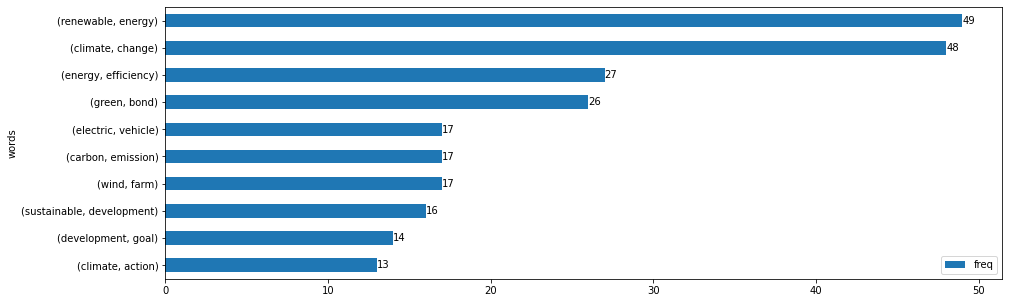

In [56]:
positive_bifreq_df_plot = positive_bifreq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in positive_bifreq_df_plot.containers:
    positive_bifreq_df_plot.bar_label(container)

### Neutral

In [57]:
neutral_bi = []
for text in neutral_df['processed_wo_punct']:
    bigram = list(nltk.bigrams(text))
    for bi in bigram:
        neutral_bi.append(bi)

In [58]:
neutral_bifreq_df = pd.DataFrame()

In [59]:
neutral_bi_list = []
neutral_bi_freq = []
for item in FreqDist(neutral_bi):
    neutral_bi_list.append(item)
    neutral_bi_freq.append(FreqDist(neutral_bi)[item])

In [60]:
neutral_bifreq_df['words'] = neutral_bi_list
neutral_bifreq_df['freq'] = neutral_bi_freq
neutral_bifreq_df.set_index('words', inplace = True)

In [61]:
print(neutral_bifreq_df.shape)
neutral_bifreq_df.head(10)

(12992, 1)


,freq
words,
"(climate, change)",98
"(environmental, social)",61
"(social, governance)",51
"(greenhouse, gas)",48
"(gas, emission)",33
"(risk, opportunity)",33
"(paris, agreement)",28
"(scope, 3)",26
"(oil, gas)",24


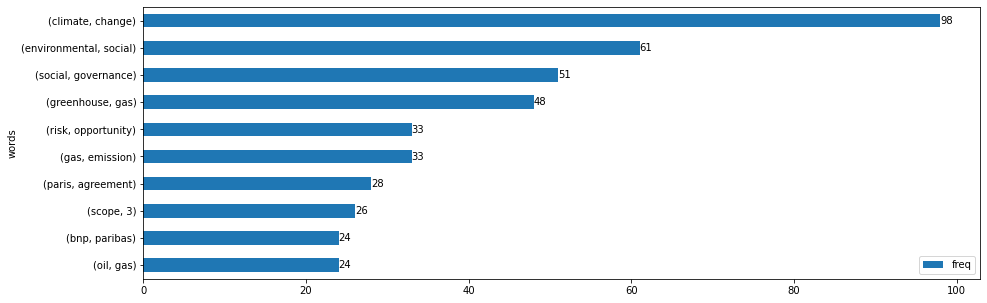

In [62]:
neutral_bifreq_df_plot = neutral_bifreq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in neutral_bifreq_df_plot.containers:
    neutral_bifreq_df_plot.bar_label(container)

### Negative

In [63]:
negative_bi = []
for text in negative_df['processed_wo_punct']:
    bigram = list(nltk.bigrams(text))
    for bi in bigram:
        negative_bi.append(bi)

In [64]:
negative_bifreq_df = pd.DataFrame()

In [65]:
negative_bi_list = []
negative_bi_freq = []
for item in FreqDist(negative_bi):
    negative_bi_list.append(item)
    negative_bi_freq.append(FreqDist(negative_bi)[item])

In [66]:
negative_bifreq_df['words'] = negative_bi_list
negative_bifreq_df['freq'] = negative_bi_freq
negative_bifreq_df.set_index('words', inplace = True)

In [67]:
print(negative_bifreq_df.shape)
negative_bifreq_df.head(10)

(11179, 1)


,freq
words,
"(climate, change)",207
"(physical, risk)",75
"(extreme, weather)",49
"(weather, event)",47
"(transition, risk)",37
"(risk, management)",36
"(impact, climate)",30
"(climate, risk)",27
"(greenhouse, gas)",23


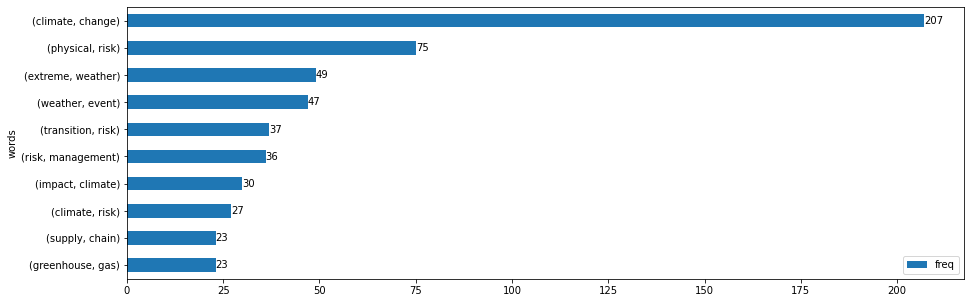

In [68]:
negative_bifreq_df_plot = negative_bifreq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in negative_bifreq_df_plot.containers:
    negative_bifreq_df_plot.bar_label(container)

### All

In [69]:
all_bi = []
for text in train_text_processed['processed_wo_punct']:
    bigram = list(nltk.bigrams(text))
    for bi in bigram:
        all_bi.append(bi)

In [70]:
all_bifreq_df = pd.DataFrame()

In [71]:
all_bi_list = []
all_bi_freq = []
for item in FreqDist(all_bi):
    all_bi_list.append(item)
    all_bi_freq.append(FreqDist(all_bi)[item])

In [72]:
all_bifreq_df['words'] = all_bi_list
all_bifreq_df['freq'] = all_bi_freq
all_bifreq_df.set_index('words', inplace = True)

In [73]:
print(all_bifreq_df.shape)
all_bifreq_df.head(10)

(31399, 1)


,freq
words,
"(climate, change)",353
"(environmental, social)",88
"(greenhouse, gas)",81
"(renewable, energy)",78
"(physical, risk)",77
"(social, governance)",60
"(gas, emission)",56
"(climate, risk)",53
"(energy, efficiency)",52


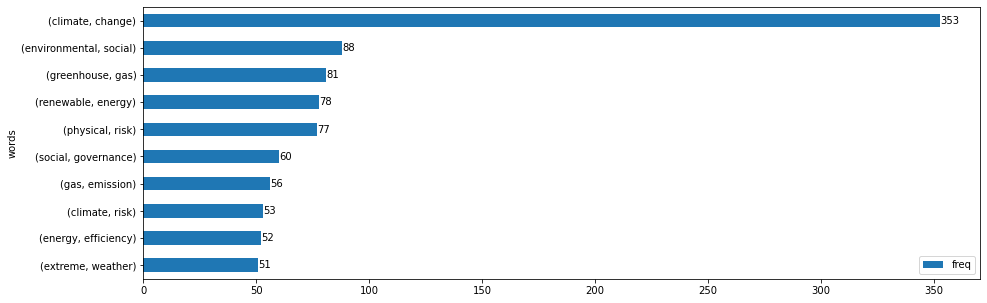

In [74]:
all_bifreq_df_plot = all_bifreq_df.head(10).sort_values(by = 'freq', ascending = True).plot.barh(figsize = (15, 5))

for container in all_bifreq_df_plot.containers:
    all_bifreq_df_plot.bar_label(container)

### Compare

In [75]:
all_bitotal = sum([num for num in all_bifreq_df['freq']])
positive_bitotal = sum([num for num in positive_bifreq_df['freq']])
neutral_bitotal = sum([num for num in neutral_bifreq_df['freq']])
negative_bitotal = sum([num for num in negative_bifreq_df['freq']])
total_bilist = [all_bitotal, positive_bitotal, neutral_bitotal, negative_bitotal]

In [129]:
total_bilist

[42303, 11347, 16322, 14634]

In [76]:
top_10_biword = all_bifreq_df.index.tolist()[0:10]

In [77]:
all_biword_df = all_bifreq_df.head(10).copy().drop('freq', axis = 1)

all_bifreq_top_10 = [num for num in all_bifreq_df.head(10)['freq']]
all_biword_df['All'] = all_bifreq_top_10

positive_bifreq_top_10 = []
for word in top_10_biword:
    if word in [('physical', 'risk'), ('extreme', 'weather')]:
        positive_bifreq_top_10.append(0)
    for item in FreqDist(positive_bi):
        if word == item:
            positive_bifreq_top_10.append(FreqDist(positive_bi)[word])
all_biword_df['Positive'] = positive_bifreq_top_10

neutral_bifreq_top_10 = []
for word in top_10_biword:
    for item in FreqDist(neutral_bi):
        if word == item:
            neutral_bifreq_top_10.append(FreqDist(neutral_bi)[word])
all_biword_df['Neutral'] = neutral_bifreq_top_10

negative_bifreq_top_10 = []
for word in top_10_biword:
    for item in FreqDist(negative_bi):
        if word == item:
            negative_bifreq_top_10.append(FreqDist(negative_bi)[word])
all_biword_df['Negative'] = negative_bifreq_top_10

In [78]:
all_biword_df

,All,Positive,Neutral,Negative
words,,,,
"(climate, change)",353,48,98,207
"(environmental, social)",88,10,61,17
"(greenhouse, gas)",81,10,48,23
"(renewable, energy)",78,49,20,9
"(physical, risk)",77,0,2,75
"(social, governance)",60,3,51,6
"(gas, emission)",56,8,33,15
"(climate, risk)",53,5,21,27
"(energy, efficiency)",52,27,22,3


In [79]:
all_biword_df_pro = all_bifreq_df.head(10).copy().drop('freq', axis = 1)

all_bipro = [(num / all_bitotal) for num in all_bifreq_df.head(10)['freq']]
all_biword_df_pro['All'] = all_bipro

positive_bipro = []
for word in top_10_biword:
    if word in [('physical', 'risk'), ('extreme', 'weather')]:
        positive_bipro.append(0)
    for item in FreqDist(positive_bi):
        if word == item:
            positive_bipro.append(FreqDist(positive_bi)[word] / positive_bitotal)
all_biword_df_pro['Positive'] = positive_bipro

neutral_bipro = []
for word in top_10_biword:
    for item in FreqDist(neutral_bi):
        if word == item:
            neutral_bipro.append(FreqDist(neutral_bi)[word] / neutral_bitotal)
all_biword_df_pro['Neutral'] = neutral_bipro

negative_bipro = []
for word in top_10_biword:
    for item in FreqDist(neutral_bi):
        if word == item:
            negative_bipro.append(FreqDist(negative_bi)[word] / negative_bitotal)
all_biword_df_pro['Negative'] = negative_bipro

In [80]:
(all_biword_df_pro * 100).round(2)

,All,Positive,Neutral,Negative
words,,,,
"(climate, change)",0.83,0.42,0.60,1.41
"(environmental, social)",0.21,0.09,0.37,0.12
"(greenhouse, gas)",0.19,0.09,0.29,0.16
"(renewable, energy)",0.18,0.43,0.12,0.06
"(physical, risk)",0.18,0.00,0.01,0.51
"(social, governance)",0.14,0.03,0.31,0.04
"(gas, emission)",0.13,0.07,0.20,0.10
"(climate, risk)",0.13,0.04,0.13,0.18
"(energy, efficiency)",0.12,0.24,0.13,0.02


In [81]:
ztesting(all_biword_df, all_biword_df_pro)

,All,Positive,Neutral,Negative
words,,,,
"(climate, change)","[1, 2, ]","[, , ]","[, 1, ]","[0, 1, 2]"
"(environmental, social)","[1, , 3]","[, , ]","[0, 1, 3]","[, , ]"
"(greenhouse, gas)","[1, , ]","[, , ]","[0, 1, 3]","[, , ]"
"(renewable, energy)","[, , 3]","[0, 2, 3]","[, , ]","[, , ]"
"(physical, risk)","[1, 2, ]","[, , ]","[, , ]","[0, 1, 2]"
"(social, governance)","[1, , 3]","[, , ]","[0, 1, 3]","[, , ]"
"(gas, emission)","[, , ]","[, , ]","[, 1, 3]","[, , ]"
"(climate, risk)","[1, , ]","[, , ]","[, 1, ]","[, 1, ]"
"(energy, efficiency)","[, , 3]","[0, 2, 3]","[, , 3]","[, , ]"


# Topic Modelling

In [82]:
import smart_open
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim
from gensim.models import CoherenceModel
from gensim import corpora, models
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models import LdaModel

## Positive

In [83]:
positive_texts = []
for text in positive_df['processed_wo_punct']:
    positive_texts.append(text)

In [84]:
positive_dictionary = corpora.Dictionary(positive_texts)
positive_corpus = [positive_dictionary.doc2bow(doc) for doc in positive_texts]

positive_model = LdaModel(
    corpus = positive_corpus,
    id2word = positive_dictionary,
    num_topics = 3,
    alpha = 2,
    eta = 'auto',
    passes = 10,
    random_state = 10,
    per_word_topics = True)

for topic in positive_model.print_topics():
    print(topic)

(0, '0.016*"energy" + 0.010*"\'s" + 0.009*"climate" + 0.008*"million" + 0.007*"renewable" + 0.006*"sustainable" + 0.006*"change" + 0.005*"efficiency" + 0.005*"power" + 0.005*"generation"')
(1, '0.015*"energy" + 0.010*"project" + 0.008*"emission" + 0.008*"new" + 0.007*"renewable" + 0.007*"2019" + 0.007*"fuel" + 0.006*"total" + 0.006*"index" + 0.006*"gas"')
(2, '0.013*"million" + 0.012*"investment" + 0.011*"fund" + 0.011*"finance" + 0.010*"green" + 0.009*"climate" + 0.009*"carbon" + 0.009*"project" + 0.008*"energy" + 0.008*"sustainable"')


In [85]:
positive_vis = gensimvis.prepare(positive_model, positive_corpus, positive_dictionary)
pyLDAvis.display(positive_vis)

## Neutral

In [130]:
neutral_texts = []
for text in neutral_df['processed_wo_punct']:
    neutral_texts.append(text)

In [131]:
neutral_dictionary = corpora.Dictionary(neutral_texts)
neutral_corpus = [neutral_dictionary.doc2bow(doc) for doc in neutral_texts]

neutral_model = LdaModel(
    corpus = neutral_corpus,
    id2word = neutral_dictionary,
    num_topics = 3,
    alpha = 2,
    eta = 'auto',
    passes = 10,
    random_state = 10,
    per_word_topics = True)

for topic in neutral_model.print_topics():
    print(topic)

(0, '0.032*"emission" + 0.012*"scope" + 0.010*"\'s" + 0.009*"gas" + 0.009*"energy" + 0.008*"use" + 0.008*"carbon" + 0.008*"fuel" + 0.008*"2" + 0.008*"change"')
(1, '0.012*"energy" + 0.008*"management" + 0.008*"bank" + 0.007*"risk" + 0.007*"project" + 0.006*"carbon" + 0.005*"scenario" + 0.005*"target" + 0.005*"power" + 0.005*"investment"')
(2, '0.021*"climate" + 0.013*"environmental" + 0.011*"risk" + 0.010*"group" + 0.010*"change" + 0.009*"\'s" + 0.009*"investment" + 0.009*"social" + 0.009*"include" + 0.009*"governance"')


In [132]:
neutral_vis = gensimvis.prepare(neutral_model, neutral_corpus, neutral_dictionary)
pyLDAvis.display(neutral_vis)

## Negative

In [89]:
negative_texts = []
for text in negative_df['processed_wo_punct']:
    negative_texts.append(text)

In [90]:
negative_dictionary = corpora.Dictionary(negative_texts)
negative_corpus = [negative_dictionary.doc2bow(doc) for doc in negative_texts]

negative_model = LdaModel(
    corpus = negative_corpus,
    id2word = negative_dictionary,
    num_topics = 3,
    alpha = 2,
    eta = 'auto',
    passes = 10,
    random_state = 10,
    per_word_topics = True)

for topic in negative_model.print_topics():
    print(topic)

(0, '0.025*"change" + 0.023*"climate" + 0.022*"risk" + 0.019*"impact" + 0.012*"increase" + 0.010*"cost" + 0.008*"weather" + 0.008*"physical" + 0.008*"result" + 0.007*"include"')
(1, '0.062*"risk" + 0.015*"climate" + 0.010*"change" + 0.009*"scenario" + 0.009*"management" + 0.008*"physical" + 0.008*"portfolio" + 0.008*"include" + 0.007*"\'s" + 0.007*"impact"')
(2, '0.017*"risk" + 0.013*"impact" + 0.012*"change" + 0.009*"business" + 0.009*"climate" + 0.009*"\'s" + 0.009*"increase" + 0.008*"group" + 0.008*"include" + 0.007*"loss"')


In [91]:
negative_vis = gensimvis.prepare(negative_model, negative_corpus, negative_dictionary)
pyLDAvis.display(negative_vis)

# Sentiment Analysis

In [92]:
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [93]:
sid = SentimentIntensityAnalyzer()

In [94]:
sentiment_score = []
for text in train_text_processed['text']:
    score = sid.polarity_scores(text)['compound']
    sentiment_score.append(score)
train_text_processed['sentiment'] = sentiment_score

In [95]:
positive_df = train_text_processed.loc[train_text_processed['label'] == 2]
neutral_df = train_text_processed.loc[train_text_processed['label'] == 1]
negative_df = train_text_processed.loc[train_text_processed['label'] == 0]

<AxesSubplot:title={'center':'sentiment'}, xlabel='label'>

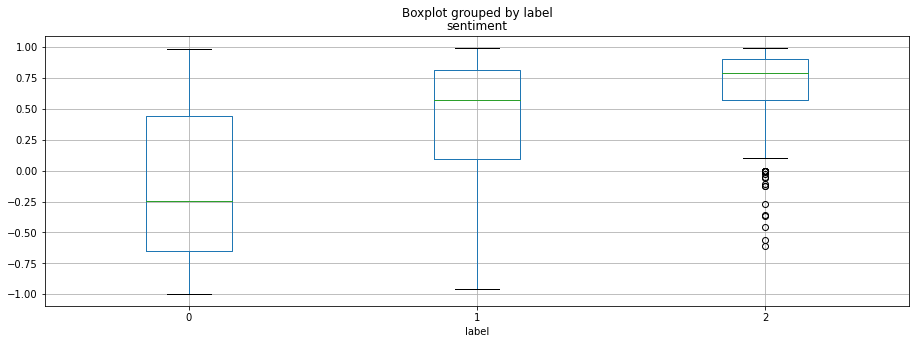

In [96]:
train_text_processed.boxplot(column='sentiment', by='label', figsize = (15,5))

In [97]:
from scipy.stats import pearsonr

In [98]:
correlation, p_value = pearsonr(train_text_processed['label'], train_text_processed['sentiment'])

In [99]:
correlation, p_value

(0.5401455003938614, 8.121214139816934e-77)